In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)

data = pd.read_csv('../data/cleaned/clean_poems.csv')

In [2]:
data.head()

,title,author,lines,linecount,text,clean_text,lemmatized,word_count,line_count
0,A Song of Autumn,Adam Lindsay Gordon,"['‘WHERE shall we go for our garlands glad', '...",16,‘WHERE shall we go for our garlands glad At th...,where shall we go for our garlands glad at the...,shall go garland glad falling year burn bank y...,121,1
1,An Exile's Farewell,Adam Lindsay Gordon,"['The ocean heaves around us still', 'With lon...",56,The ocean heaves around us still With long and...,the ocean heaves around us still with long and...,ocean heave around still long measure swell au...,314,1
2,I Have A Rendezvous With Death,Alan Seeger,"['I have a rendezvous with Death', 'At some di...",24,I have a rendezvous with Death At some dispute...,i have a rendezvous with death at some dispute...,I rendezvous death dispute barricade spring co...,158,1
3,Ode in Memory of the American Volunteers Falle...,Alan Seeger,"['I', '', 'Ay, it is fitting on this holiday,'...",104,"I Ay, it is fitting on this holiday, Commemor...",i ay it is fitting on this holiday commemorati...,I ay fitting holiday commemorative soldier dea...,737,1
4,Fragments,Alan Seeger,"['In that fair capital where Pleasure, crowned...",83,"In that fair capital where Pleasure, crowned A...",in that fair capital where pleasure crowned am...,fair capital pleasure crown amidst myriad cour...,611,1


In [3]:
data.shape


(3162, 9)

In [4]:
print(data.dtypes.value_counts())


object    6
int64     3
dtype: int64


<AxesSubplot:>

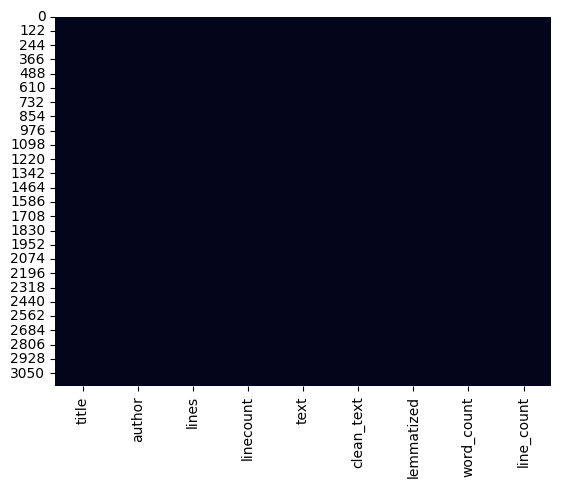

In [5]:
sns.heatmap(data.isna(), cbar=False)

In [6]:
print((data.isna().sum()/data.shape[0]).sort_values(ascending=True))

title         0.0
author        0.0
lines         0.0
linecount     0.0
text          0.0
clean_text    0.0
lemmatized    0.0
word_count    0.0
line_count    0.0
dtype: float64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       3162 non-null   object
 1   author      3162 non-null   object
 2   lines       3162 non-null   object
 3   linecount   3162 non-null   int64 
 4   text        3162 non-null   object
 5   clean_text  3162 non-null   object
 6   lemmatized  3162 non-null   object
 7   word_count  3162 non-null   int64 
 8   line_count  3162 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 222.5+ KB


In [11]:
data.describe()

,linecount,word_count,line_count
count,3162.000000,3162.000000,3162.0
mean,91.572106,667.741935,1.0
std,397.036986,2999.479899,0.0
min,1.000000,8.000000,1.0
25%,14.000000,93.000000,1.0
50%,20.000000,130.000000,1.0
75%,47.000000,323.000000,1.0
max,16092.000000,124954.000000,1.0


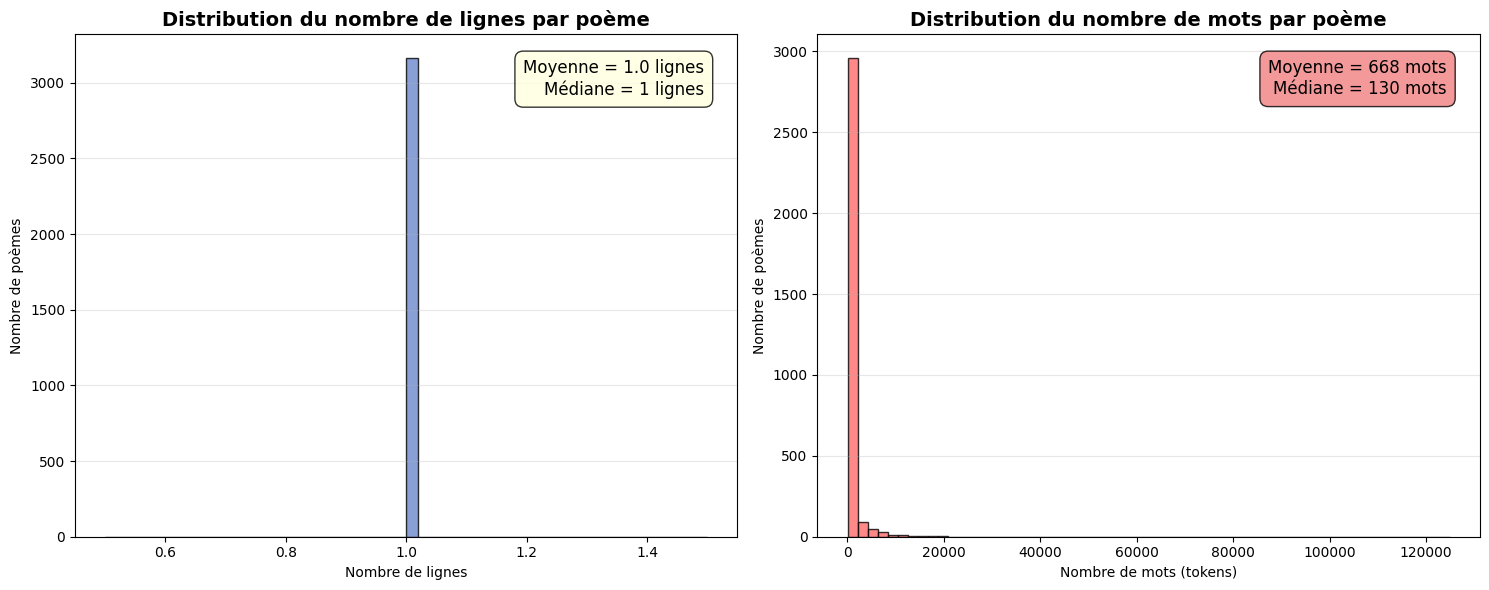

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution en nombre de lignes
ax1.hist(data['line_count'], bins=50, color='#6a89cc', edgecolor='black', alpha=0.8)
ax1.set_title("Distribution du nombre de lignes par poème", fontsize=14, fontweight='bold')
ax1.set_xlabel("Nombre de lignes")
ax1.set_ylabel("Nombre de poèmes")
ax1.grid(axis='y', alpha=0.3)
ax1.annotate(f"Moyenne = {data['line_count'].mean():.1f} lignes\nMédiane = {data['line_count'].median():.0f} lignes",
             xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
             fontsize=12)

# Distribution en nombre de mots (tokens)
ax2.hist(data['word_count'], bins=60, color='#ff6b6b', edgecolor='black', alpha=0.8)
ax2.set_title("Distribution du nombre de mots par poème", fontsize=14, fontweight='bold')
ax2.set_xlabel("Nombre de mots (tokens)")
ax2.set_ylabel("Nombre de poèmes")
ax2.grid(axis='y', alpha=0.3)
ax2.annotate(f"Moyenne = {data['word_count'].mean():.0f} mots\nMédiane = {data['word_count'].median():.0f} mots",
             xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8),
             fontsize=12)

plt.tight_layout()
plt.show()

Nombre moyen de mots par poème : 667.7
Poème le plus long : Don Juan (124954 mots)
Poème le plus court : Winter under cultivation (8 mots)


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layou'

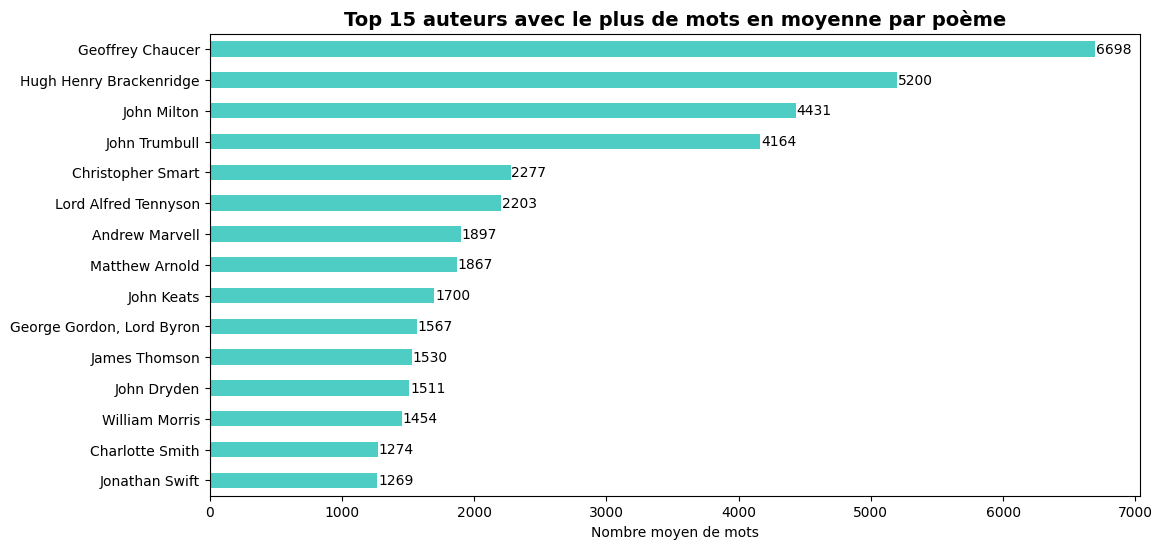

In [9]:
print(f"Nombre moyen de mots par poème : {data['word_count'].mean():.1f}")
print(f"Poème le plus long : {data.loc[data['word_count'].idxmax(), 'title']} ({data['word_count'].max()} mots)")
print(f"Poème le plus court : {data.loc[data['word_count'].idxmin(), 'title']} ({data['word_count'].min()} mots)")

# Moyenne par auteur (top 15 les plus bavards)
avg_words_by_author = data.groupby('author')['word_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_words_by_author.head(15).plot(kind='barh', color='#4ecdc4')
plt.title("Top 15 auteurs avec le plus de mots en moyenne par poème", fontsize=14, fontweight='bold')
plt.xlabel("Nombre moyen de mots")
plt.ylabel("")
for i, v in enumerate(avg_words_by_author.head(15)):
    plt.text(v + 5, i, f"{v:.0f}", va='center', fontsize=10)
plt.gca().invert_yaxis()
plt.tight_layou

In [10]:
from collections import Counter
import nltk
from nltk.corpus import stopwords import words
nltk.download('stopwords')  # une seule fois

stopwords = set(words("english"))

# On éclate tous les lemmatized
all_words = ' '.join(data['lemmatized'].dropna()).split()
filtered_words = [word for word in all_words if word not in stopwords and len(word) > 2]

top_30 = Counter(filtered_words).most_common(30)

words, counts = zip(*top_30)

plt.figure(figsize=(12, 8))
bars = plt.bar(words, counts, color='#a29bfe', edgecolor='black', alpha=0.85)
plt.title("Top 30 mots les plus fréquents (hors stopwords)", fontsize=16, fontweight='bold')
plt.ylabel("Fréquence")
plt.xticks(rotation=45, ha='right')

# Annotation sur chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (3985693406.py, line 3)

In [20]:
from nltk import bigrams, trigrams

# Bigrams
bigram_list = list(bigrams(filtered_words))
top_bigrams = Counter(bigram_list).most_common(20)

# Trigrams
trigram_list = list(trigrams(filtered_words))
top_trigrams = Counter(trigram_list).most_common(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Bigrams
bigrams_str = [' '.join(gram) for gram in zip(*top_bigrams)[0]]
counts_bi = zip(*top_bigrams)[1]
ax1.barh = ax1.barh(bigrams_str, counts_bi, color='#fd79a8')
ax1.set_title("Top 20 bigrams les plus fréquents", fontsize=14, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(counts_bi):
    ax1.text(v + 10, i, str(v), va='center')

# Trigrams
trigrams_str = [' '.join(gram) for gram in zip(*top_trigrams)[0]]
counts_tri = zip(*top_trigrams)[1]
ax2.barh(trigrams_str, counts_tri, color='#00b894')
ax2.set_title("Top 20 trigrams les plus fréquents", fontsize=14, fontweight='bold')
ax2.invert_yaxis()
for i, v in enumerate(counts_tri):
    ax2.text(v + 5, i, str(v), va='center')

plt.tight_layout()
plt.show()

NameError: name 'filtered_words' is not defined

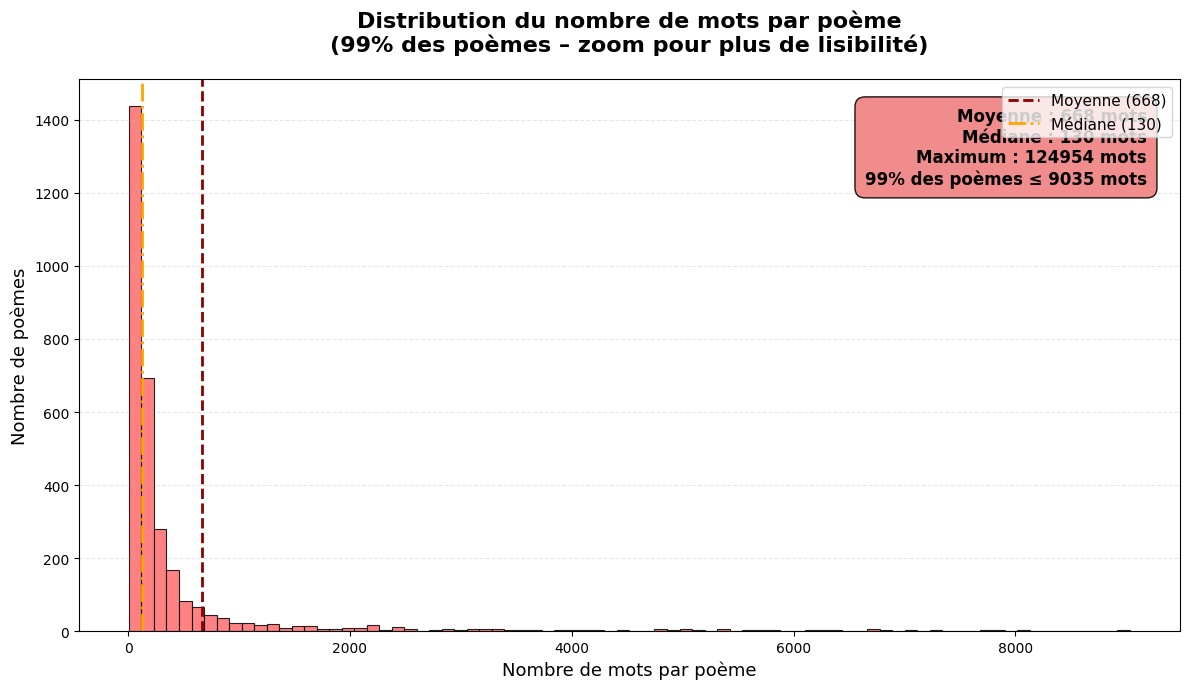

→ 99% des poèmes ont moins de 9035 mots
→ La majorité des poèmes font entre 50 et 300 mots environ


In [22]:
import matplotlib.pyplot as plt
import pandas as pd



plt.figure(figsize=(12, 7))

# On zoome sur 99% des données (on enlève les extrêmes très longs pour une meilleure lisibilité)
percentile_99 = data ['word_count'].quantile(0.99)
data_to_plot = data [data ['word_count'] <= percentile_99]

# Histogramme propre avec plus de bins et échelle adaptée
plt.hist(data_to_plot['word_count'], bins=80, color='#ff6b6b', edgecolor='black', alpha=0.85, linewidth=0.8)

# Titres et labels
plt.title("Distribution du nombre de mots par poème\n(99% des poèmes – zoom pour plus de lisibilité)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Nombre de mots par poème", fontsize=13)
plt.ylabel("Nombre de poèmes", fontsize=13)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Stats en haut à droite
mean_words = data ['word_count'].mean()
median_words = data ['word_count'].median()
max_words = data ['word_count'].max()

plt.annotate(f"Moyenne : {mean_words:.0f} mots\n"
             f"Médiane : {median_words:.0f} mots\n"
             f"Maximum : {max_words} mots\n"
             f"99% des poèmes ≤ {percentile_99:.0f} mots",
             xy=(0.97, 0.95), xycoords='axes fraction',
             ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.6", facecolor="lightcoral", alpha=0.9),
             fontsize=12, fontweight='bold')

# Optionnel : ligne verticale à la moyenne et médiane
plt.axvline(mean_words, color='darkred', linestyle='--', linewidth=2, label=f'Moyenne ({mean_words:.0f})')
plt.axvline(median_words, color='orange', linestyle='-.', linewidth=2, label=f'Médiane ({median_words:.0f})')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Petit résumé dans la console
print(f"→ 99% des poèmes ont moins de {percentile_99:.0f} mots")
print(f"→ La majorité des poèmes font entre 50 et 300 mots environ")

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(14, 8))
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='white',
    colormap='viridis',
    max_words=150,
    min_font_size=10
).generate(' '.join(filtered_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots – PoetryDB (lemmatisé, sans stopwords)", fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Sauvegarde si tu veux
# wordcloud.to_file("../visualisation/wordcloud_poetrydb.png")

NameError: name 'filtered_words' is not defined

<Figure size 1400x800 with 0 Axes>

In [25]:
data.column()

AttributeError: 'DataFrame' object has no attribute 'column'

In [26]:
data.columns

Index(['title', 'author', 'lines', 'linecount', 'text', 'clean_text',
       'lemmatized', 'word_count', 'line_count'],
      dtype='object')

In [28]:
data['text'].iloc[1]


"The ocean heaves around us still With long and measured swell, The autumn gales our canvas fill, Our ship rides smooth and well. The broad Atlantic's bed of foam Still breaks against our prow; I shed no tears at quitting home, Nor will I shed them now!  Against the bulwarks on the poop I lean, and watch the sun Behind the red horizon stoop — His race is nearly run. Those waves will never quench his light, O'er which they seem to close, To-morrow he will rise as bright As he this morning rose.  How brightly gleams the orb of day Across the trackless sea! How lightly dance the waves that play Like dolphins in our lee! The restless waters seem to say, In smothered tones to me, How many thousand miles away My native land must be!  Speak, Ocean! is my Home the same Now all is new to me? — The tropic sky's resplendent flame, The vast expanse of sea? Does all around her, yet unchanged, The well-known aspect wear? Oh! can the leagues that I have ranged Have made no difference there?  How vivi

In [11]:
import re
data['sentence_count'] = data['text'].apply(lambda x: len(re.split(r'[.!?]', str(x))) - 1)

In [12]:
# Vérification
data[['title', 'sentence_count']].head()


,title,sentence_count
0,A Song of Autumn,8
1,An Exile's Farewell,18
2,I Have A Rendezvous With Death,7
3,Ode in Memory of the American Volunteers Falle...,13
4,Fragments,23


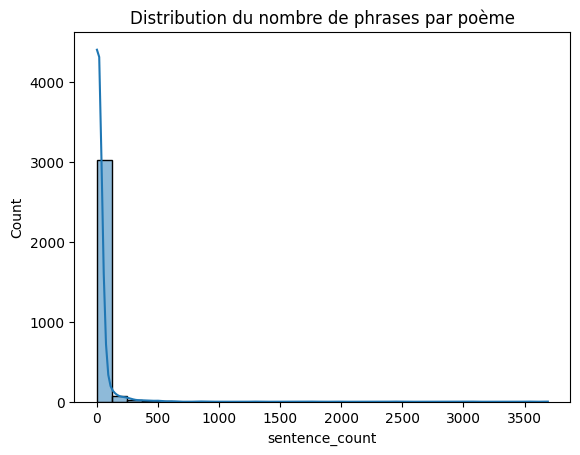

In [13]:
sns.histplot(data['sentence_count'], bins=30, kde=True)
plt.title("Distribution du nombre de phrases par poème")
plt.show()

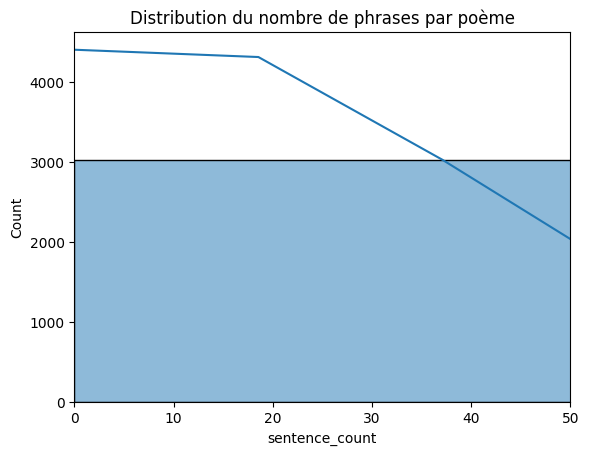

In [14]:
sns.histplot(data['sentence_count'], bins=30, kde=True)
plt.title("Distribution du nombre de phrases par poème")
plt.xlim(0, 50)  # par exemple, limiter à 50 phrases max
plt.show()


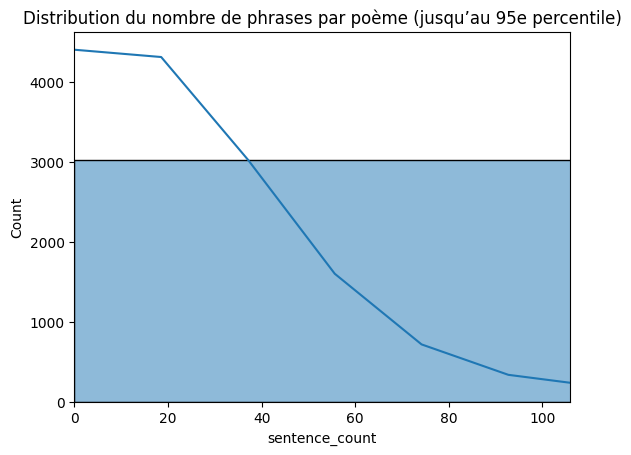

In [35]:
sns.histplot(data['sentence_count'], bins=30, kde=True)
plt.title("Distribution du nombre de phrases par poème (jusqu’au 95e percentile)")
plt.xlim(0, data['sentence_count'].quantile(0.95))
plt.show()

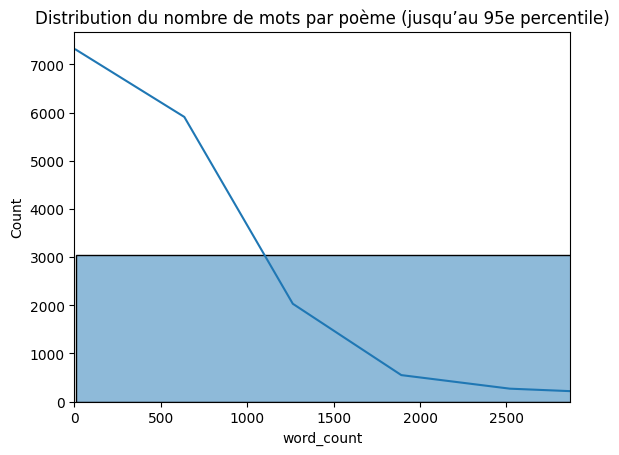

In [38]:
# Limiter à 95% des poèmes
max_words = data['word_count'].quantile(0.95)

sns.histplot(data['word_count'], bins=30, kde=True)
plt.title("Distribution du nombre de mots par poème (jusqu’au 95e percentile)")
plt.xlim(0, max_words)
plt.show()

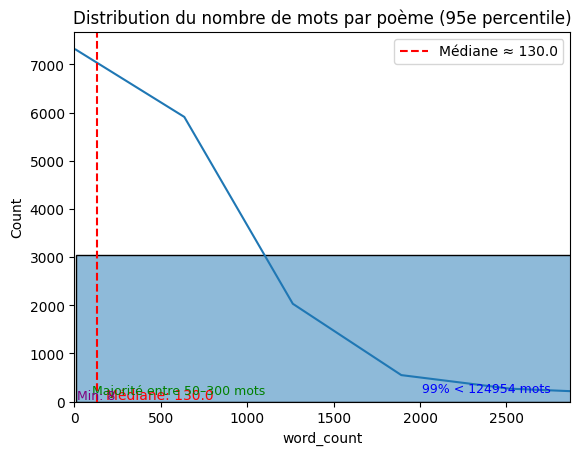

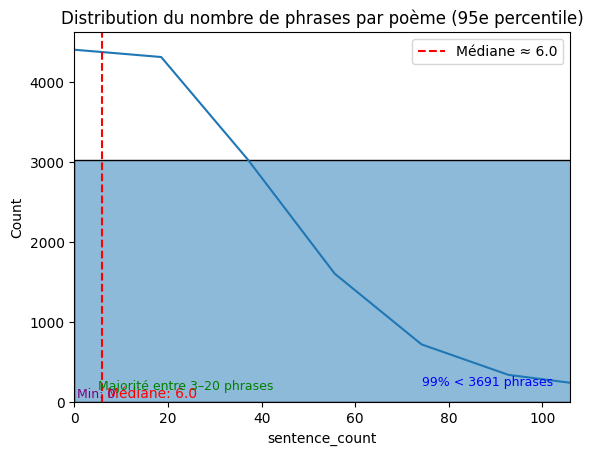

In [15]:
# Distribution du nombre de mots par poème
max_words = data['word_count'].quantile(0.95)
min_words = data['word_count'].min()
max_all = data['word_count'].max()
median_words = data['word_count'].median()

sns.histplot(data['word_count'], bins=30, kde=True)
plt.title("Distribution du nombre de mots par poème (95e percentile)")
plt.xlim(0, max_words)

# Annotations pertinentes
plt.axvline(median_words, color='red', linestyle='--', label=f"Médiane ≈ {median_words}")
plt.text(median_words+50, 50, f"Médiane: {median_words}", color='red')

plt.text(max_words*0.7, 200, f"99% < {max_all} mots", fontsize=9, color='blue')
plt.text(100, 150, "Majorité entre 50–300 mots", fontsize=9, color='green')
plt.text(min_words+5, 50, f"Min: {min_words}", fontsize=9, color='purple')

plt.legend()
plt.show()


# Distribution du nombre de phrases par poème
max_sent = data['sentence_count'].quantile(0.95)
min_sent = data['sentence_count'].min()
max_sent_all = data['sentence_count'].max()
median_sent = data['sentence_count'].median()

sns.histplot(data['sentence_count'], bins=30, kde=True)
plt.title("Distribution du nombre de phrases par poème (95e percentile)")
plt.xlim(0, max_sent)

# Annotations pertinentes
plt.axvline(median_sent, color='red', linestyle='--', label=f"Médiane ≈ {median_sent}")
plt.text(median_sent+1, 50, f"Médiane: {median_sent}", color='red')

plt.text(max_sent*0.7, 200, f"99% < {max_sent_all} phrases", fontsize=9, color='blue')
plt.text(5, 150, "Majorité entre 3–20 phrases", fontsize=9, color='green')
plt.text(min_sent+0.5, 50, f"Min: {min_sent}", fontsize=9, color='purple')

plt.legend()
plt.show()


In [16]:

# Nombre moyen de mots par poème
mean_tokens = data['word_count'].mean()
min_tokens = data['word_count'].min()
max_tokens = data['word_count'].max()

print(f"Nombre moyen de tokens : {mean_tokens:.2f}")
print(f"Min : {min_tokens} | Max : {max_tokens}")

Nombre moyen de tokens : 667.74
Min : 8 | Max : 124954


In [17]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords si nécessaire
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # ou 'french' si tes poèmes sont en français

# Tokenisation simple sur la colonne 'clean_text'
all_tokens = []
for text in data['clean_text']:
    tokens = str(text).split()
    tokens = [t for t in tokens if t.lower() not in stop_words]
    all_tokens.extend(tokens)

# Compter les mots les plus fréquents
word_freq = Counter(all_tokens).most_common(20)

# Afficher les 20 mots les plus fréquents
print("Mots les plus fréquents (hors stopwords) :")
for word, freq in word_freq:
    print(f"{word} : {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mots les plus fréquents (hors stopwords) :
thy : 8179
thou : 7530
like : 5817
one : 5427
thee : 5143
love : 5105
yet : 4832
shall : 4779
may : 4258
would : 3820
man : 3793
er : 3760
day : 3556
god : 3485
upon : 3475
still : 3303
heart : 3275
let : 3263
see : 3243
ye : 3117


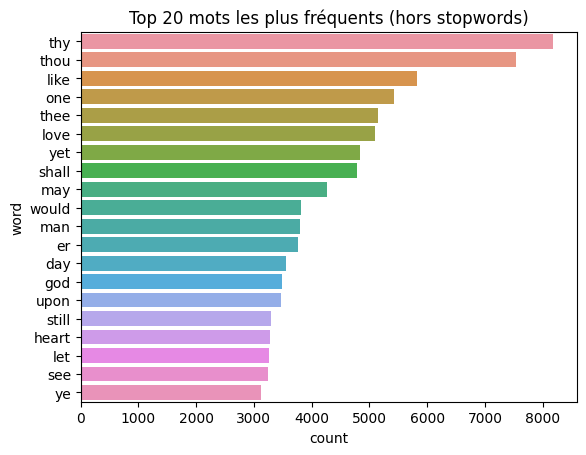

In [18]:
# Transformer en DataFrame pour visualiser
freq_df = pd.DataFrame(word_freq, columns=['word', 'count'])

sns.barplot(x='count', y='word', data=freq_df)
plt.title("Top 20 mots les plus fréquents (hors stopwords)")
plt.show()


In [19]:
from collections import Counter
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

# Télécharger stopwords si besoin
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # ou 'french' si tes poèmes sont en français

# Tokenisation + suppression des stopwords
all_tokens = []
for text in data['clean_text']:
    tokens = str(text).split()
    tokens = [t for t in tokens if t.lower() not in stop_words]
    all_tokens.extend(tokens)

# Bigrams
bigrams = list(ngrams(all_tokens, 2))
bigram_freq = Counter(bigrams).most_common(20)

# Trigrams
trigrams = list(ngrams(all_tokens, 3))
trigram_freq = Counter(trigrams).most_common(20)

print("Top 20 bigrams fréquents :")
for bg, freq in bigram_freq:
    print(f"{' '.join(bg)} : {freq}")

print("\nTop 20 trigrams fréquents :")
for tg, freq in trigram_freq:
    print(f"{' '.join(tg)} : {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 bigrams fréquents :
thou art : 689
ne er : 583
thou hast : 507
let us : 316
thou shalt : 265
e er : 264
art thou : 255
st thou : 225
thee thy : 190
whate er : 186
hast thou : 179
wilt thou : 174
thee thou : 174
thou wilt : 166
dost thou : 160
ev ry : 159
thou dost : 156
thou canst : 155
thou wert : 148
heav n : 144

Top 20 trigrams fréquents :
r b back : 67
thou know st : 59
b back note : 55
thou may st : 41
bells bells bells : 31
thou say st : 29
thou hast done : 28
ne er shall : 26
know st thou : 26
may st thou : 25
think st thou : 25
let us go : 24
would st thou : 23
thee thou art : 23
thou hast seen : 22
thou lov st : 22
thou art thou : 20
ye shall hear : 20
shall ne er : 18
thou art gone : 18


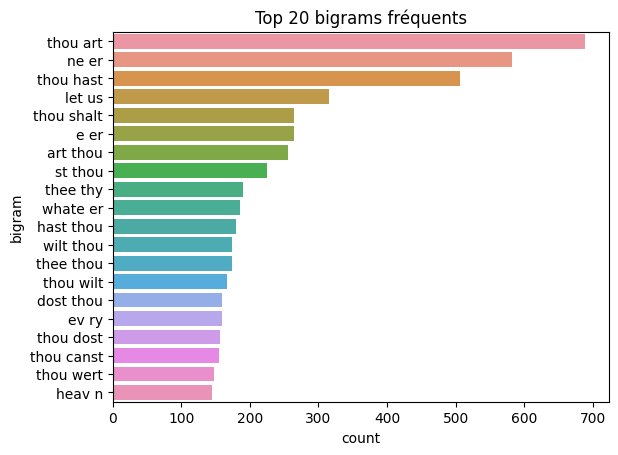

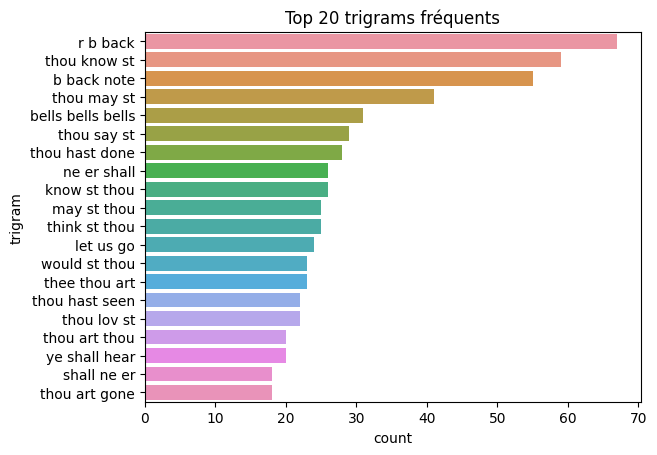

In [20]:
# Bigrams
bigram_df = pd.DataFrame(bigram_freq, columns=['bigram', 'count'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

sns.barplot(x='count', y='bigram', data=bigram_df)
plt.title("Top 20 bigrams fréquents")
plt.show()

# Trigrams
trigram_df = pd.DataFrame(trigram_freq, columns=['trigram', 'count'])
trigram_df['trigram'] = trigram_df['trigram'].apply(lambda x: ' '.join(x))

sns.barplot(x='count', y='trigram', data=trigram_df)
plt.title("Top 20 trigrams fréquents")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


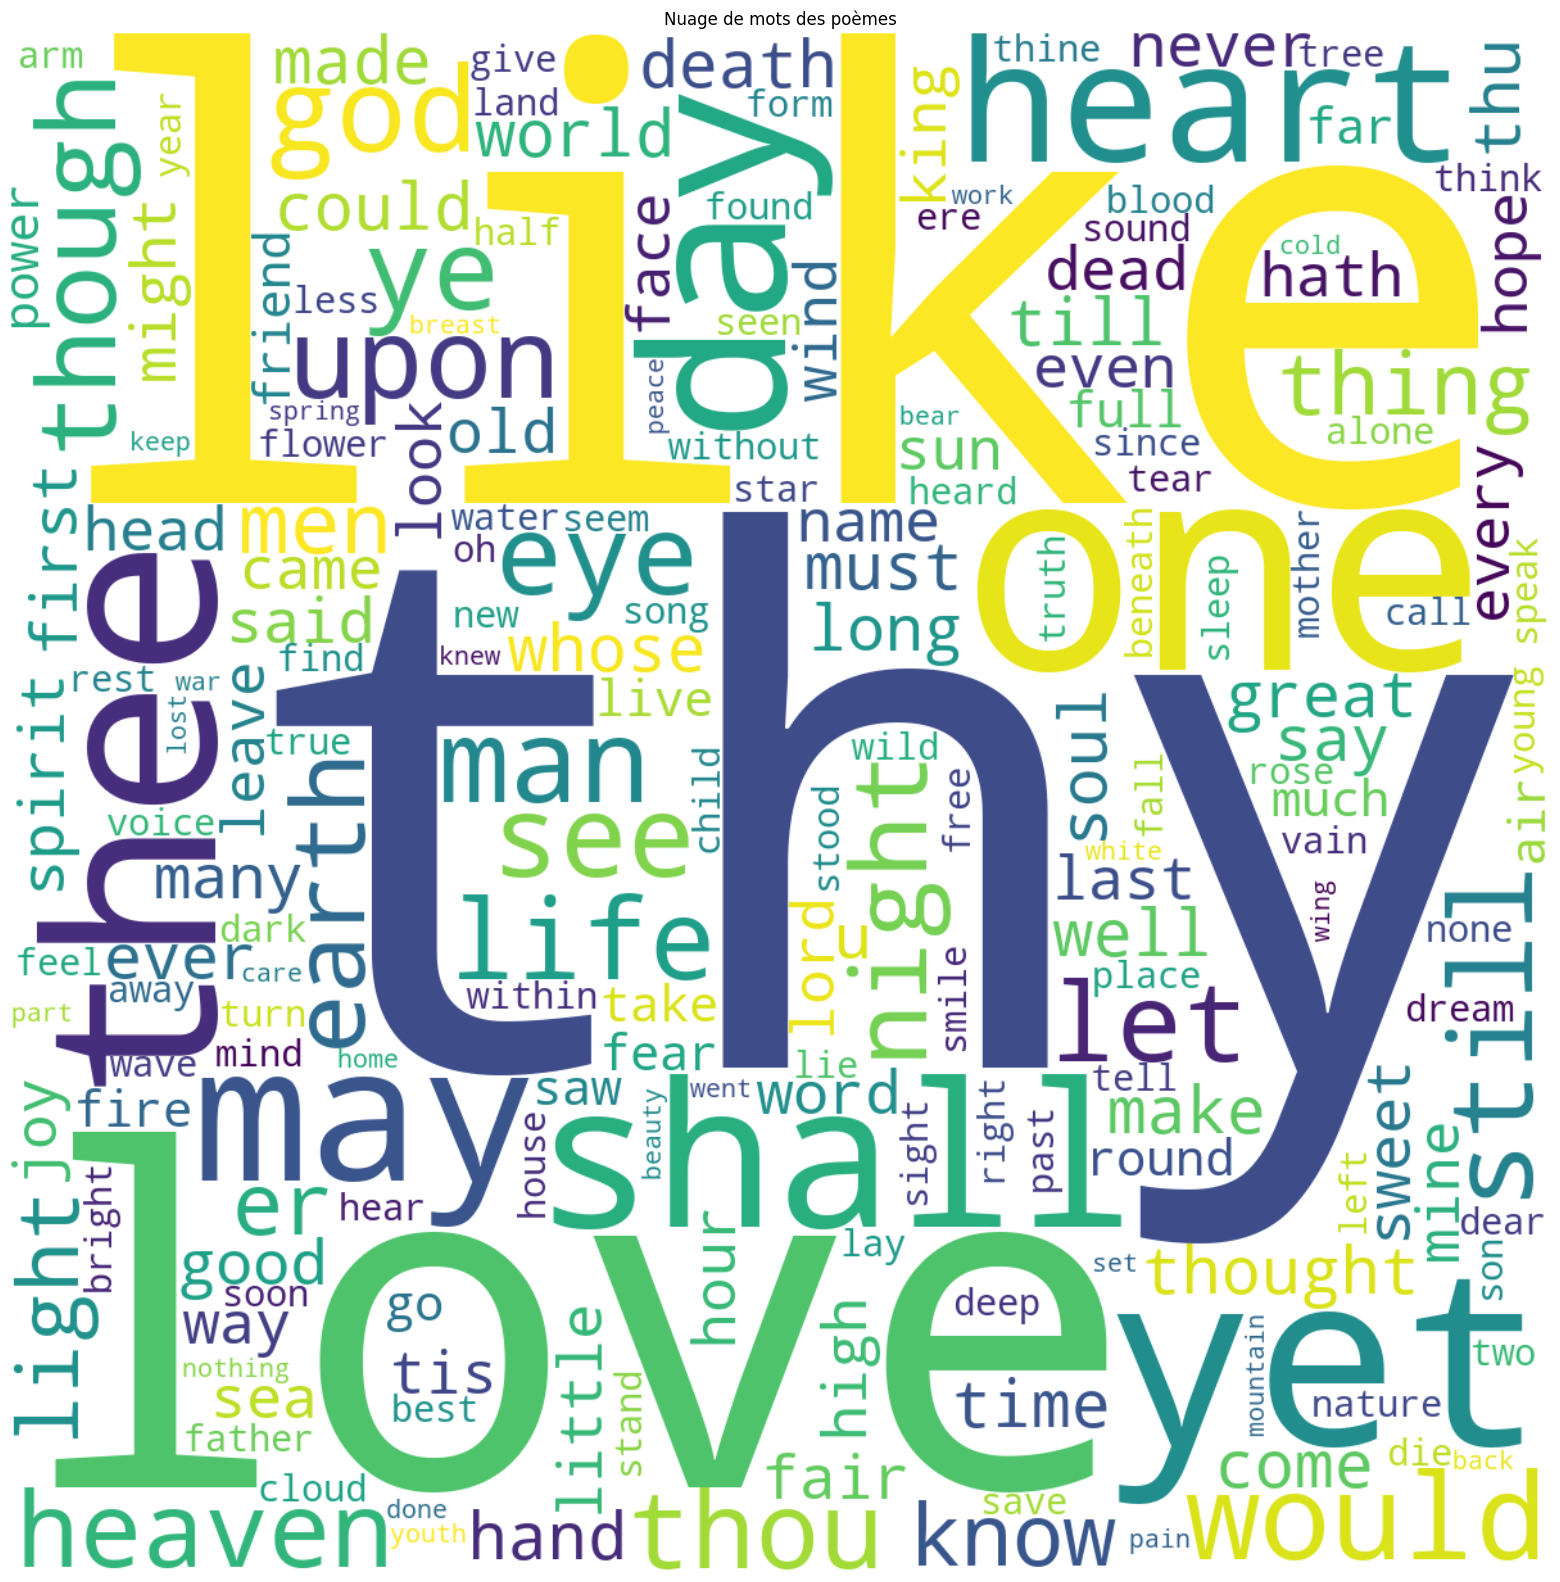

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords si nécessaire
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # ou 'french' si tes poèmes sont en français

# Concaténer tous les poèmes nettoyés
text_all = " ".join(data['clean_text'].astype(str))

# Générer le nuage de mots
wordcloud = WordCloud(width=1200, height=1200,
                      background_color='white',
                      stopwords=stop_words,
                      max_words=200).generate(text_all)

# Afficher
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des poèmes")
plt.show()


In [22]:
# Vérifier les doublons exacts dans la colonne clean_text
duplicates = data[data.duplicated(subset=['clean_text'], keep=False)]

# Afficher les doublons
print(f"Nombre total de doublons exacts : {duplicates.shape[0]}")
duplicates.head()


Nombre total de doublons exacts : 46


,title,author,lines,linecount,text,clean_text,lemmatized,word_count,line_count,sentence_count
145,To my Dear and Loving Husband,Anne Bradstreet,"['If ever two were one, then surely we.', ""If ...",12,"If ever two were one, then surely we. If ever ...",if ever two were one then surely we if ever ma...,ever two one surely ever man lov wife thee eve...,103,1,8
152,To My Dear And Loving Husband,Anne Bradstreet,"['If ever two were one, then surely we.', ""If ...",12,"If ever two were one, then surely we. If ever ...",if ever two were one then surely we if ever ma...,ever two one surely ever man lov wife thee eve...,103,1,8
210,The Wife's Will,Charlotte Bronte,"['SIT still\xada word\xada breath may break', ...",60,SIT still­a word­a breath may break (As light ...,sit still a word a breath may break as light a...,sit still word breath may break light air stir...,400,1,24
211,The Wife's Will,Charlotte Bronte,['Sit still\xad a word\xad a breath may break'...,60,Sit still­ a word­ a breath may break (As ligh...,sit still a word a breath may break as light a...,sit still word breath may break light air stir...,402,1,24
238,Jubilate Agno (excerpt),Christopher Smart,"['For I will consider my Cat Jeoffry.', 'For h...",74,For I will consider my Cat Jeoffry. For he is ...,for i will consider my cat jeoffry for he is t...,I consider cat jeoffry servant live god duly d...,853,1,76


In [23]:
# Compter combien de fois chaque poème est répété
dup_counts = data['clean_text'].value_counts()
dup_counts = dup_counts[dup_counts > 1]

print("Poèmes répétés :")
print(dup_counts)


Poèmes répétés :
here a little child i stand heaving up my either hand cold as paddocks though they be here i lift them up to thee for a benison to fall on our meat and on us all amen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectoriser les poèmes
tfidf = TfidfVectorizer().fit_transform(data['clean_text'])

# Calculer la similarité cosinus
similarity_matrix = cosine_similarity(tfidf)

# Exemple : afficher les paires très similaires (>0.9)
import numpy as np

similar_pairs = np.argwhere(similarity_matrix > 0.9)
for i, j in similar_pairs:
    if i < j:  # éviter les doublons symétriques
        print(f"Poème {i} et Poème {j} sont très similaires (score={similarity_matrix[i,j]:.2f})")


ModuleNotFoundError: No module named 'sklearn'

In [25]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords si nécessaire
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # ou 'french' selon ta langue

# Tokenisation + nettoyage
all_tokens = []
for text in data['clean_text']:
    tokens = str(text).lower().split()
    tokens = [t for t in tokens if t not in stop_words]
    all_tokens.extend(tokens)

# Compter les mots
word_freq = Counter(all_tokens).most_common(30)

# Afficher les 30 mots les plus fréquents
print("Top 30 mots les plus fréquents (hors stopwords) :")
for word, freq in word_freq:
    print(f"{word} : {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 30 mots les plus fréquents (hors stopwords) :
thy : 8179
thou : 7530
like : 5817
one : 5427
thee : 5143
love : 5105
yet : 4832
shall : 4779
may : 4258
would : 3820
man : 3793
er : 3760
day : 3556
god : 3485
upon : 3475
still : 3303
heart : 3275
let : 3263
see : 3243
ye : 3117
life : 3053
though : 2843
men : 2688
night : 2664
well : 2642
thus : 2597
us : 2585
could : 2565
must : 2557
earth : 2541
